In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [17]:
## generate data
X,y = make_regression(n_samples = 1000, n_features = 5, n_informative = 3)
y = y+0.5*np.std(y)*np.random.randn(np.size(y))

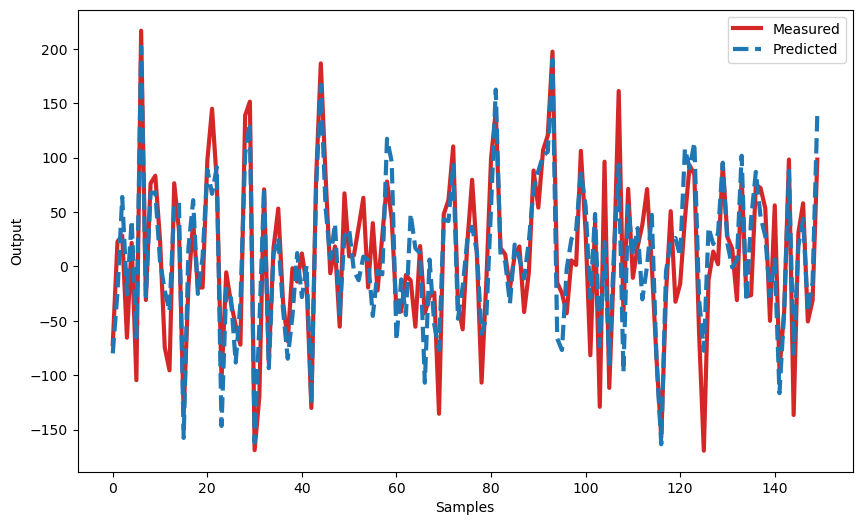

In [21]:
#Let's train a linear model with default parameters 
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=random_seed)


#create pipeline that includes scaling and gradient descent
reg = Pipeline([('scaler', StandardScaler()),
                ('SGD', SGDRegressor())])
#fit the model with data
reg.fit(X_train,y_train);

#make a prediction 
y_pred = reg.predict(X_test)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(10,6))
plt.plot(y_test, label= 'Measured', lw = 3, color='tab:red');
plt.plot(y_pred, '--', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.xlabel('Samples')
plt.ylabel('Output')
plt.legend()
plt.show();

How do we evaluate the quality of the model?

### Option 1 : RMSE 
The RMSE is a good initial option. The RMSE is defined as 
$$
RMSE = \frac{1}{N}\sum_{i=0}^{N}\left(\hat{y}[i] - y[i]\right)^{2}
$$
where $ y[i]$ is the measured data and $\hat{y}[i]$ is the predicted data.

However, the RMSE is influenced by the signal's variance. 


### Option 2 : R2 score

The R2 score is a normalized version of the RMSE, if provides values between 0 and 1. The R2 score is defined as
$$
R2 \ score = 1 - \frac{\sum_{i=0}^{N}\left(\hat{y}[i] - y[i]\right)^{2}}{\sum_{i=0}^{N}\left(y[i] - \bar{y}\right)^{2}}
$$

where $\bar{y}$ is the mean of $ y[i]$.

Note that the R2 score can be negative. what do you think is the meaning of that? 


### Option 3 : Adjusted R2 score

The adjusted R2 score applies a penalty to the R2 score based on the number of features used for prediction. 

$$
adj \ R2 \ score = 1 - (1 - R2)\left[\frac{(N-1)}{(N-k-1)}\right]
$$

where $N$ is the number of samples, and $k$ is the number of features. 

The difference betwee the R2 score and the adjusted R2 score is:

- The R2 score will always improve by including additional columns to the $X$ matrix (additional predictors)
- The adj R2 score will improve only if the a new predictor decreases the RMSE

In [25]:
#Example
from sklearn.metrics import mean_squared_error, r2_score


def adj_r2_score(r2_score, X): #function that computes the adjusted r2 score
    #get number of samples and regressor from X matrix
    N,k = X.shape
    
    return (1- ((1-r2_score)*(N-1)/(N-k-1)))

In [29]:
RMSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adj_r2 = adj_r2_score(r2,X_test)

print(f'RMSE = {RMSE} \nR2 Score = {r2} \nAdj R2 score = {adj_r2}')

RMSE = 1208.427031592927 
R2 Score = 0.7821517803615649 
Adj R2 score = 0.7745876060685637


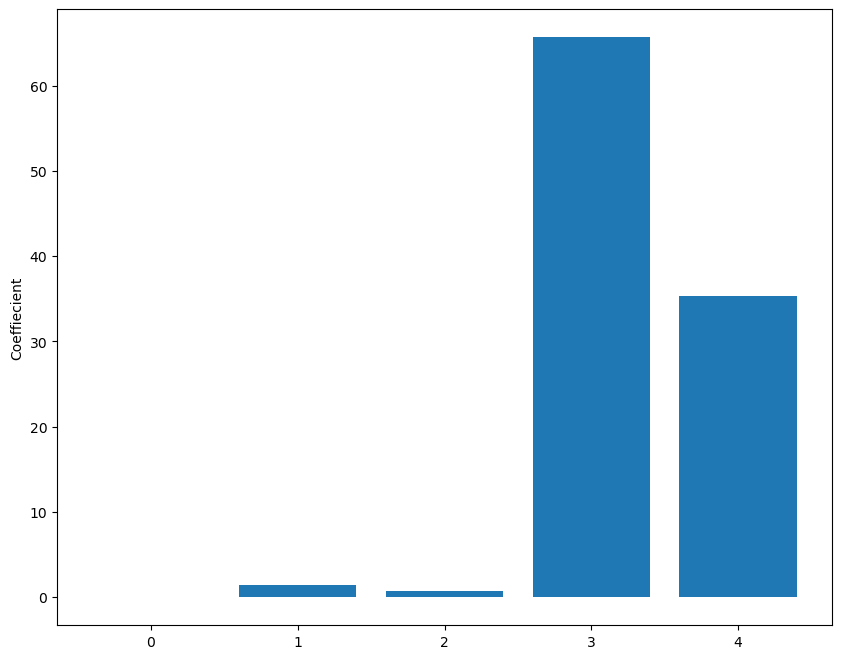

In [31]:
#We can eliminate the data that is not contributing to the prediction 
#de normalize the coeficients
coefficients = np.true_divide(reg.named_steps['SGD'].coef_,  reg.named_steps['scaler'].scale_) 
fig,ax = plt.subplots(1,1,figsize=(10,8))
plt.bar(range(len(coefficients)),coefficients)
#plt.xticks(range(len(coefficients)), features)
plt.ylabel('Coeffiecient')
plt.show();

In [36]:
#fit the model with data
reg.fit(X_train[:,[1,3,4]],y_train);

#make a prediction 
y_pred = reg.predict(X_test[:,[1,3,4]])

RMSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adj_r2 = adj_r2_score(r2,X_test[:,[1,3,4]])

print(f'RMSE = {RMSE} \nR2 Score = {r2} \nAdj R2 score = {adj_r2}')

RMSE = 1204.758153138808 
R2 Score = 0.782813184499675 
Adj R2 score = 0.7783504417154217
